In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# source - IHME GBD 2019
df_alcohol = pd.read_csv("alcohol_use_disorders.csv")

# source - The World Bank Global Financial Development
df_risk = pd.read_csv("stock_price_volatility_g7.csv")

### Data Preperation

In [4]:
df_risk = df_risk.drop(["Series Name", "Country Code"], axis = 1)
df_risk = df_risk.rename(columns={"Country Name": "Country"})
df_risk.loc[2, "Country"] = "South Korea"

In [5]:
#Rename year for df_risk

year_index = {}
year_list = []

for i_year in range(1990, 2022):
    year_list.append(i_year)

for year in year_list:
    target_index = f"{year}"+" [YR"+f"{year}"+"]"
    year_index[target_index] = year
    
df_risk = df_risk.rename(columns=year_index)
df_risk = df_risk.sort_values("Country")

In [6]:
alcohol_code = "Current number of cases of alcohol use disorders per 100 people, in both sexes aged age-standardized"
df_alcohol = df_alcohol.rename(columns={"Entity": "Country", alcohol_code: "Alcohol"})
df_alcohol = df_alcohol.drop(["Code"], axis = 1)

In [8]:
#Select Countries for df_alcohol
country_index = []
country_list = list(df_risk["Country"].unique())
for i_country in range(6840):
    if df_alcohol["Country"][i_country] in country_list:
        country_index.append(i_country)

In [9]:
#Change df_alcohol to DataFrame containing target countries only
df_alc = pd.DataFrame()
for col_name in ["Country", "Year", "Alcohol"]:
    df_alc[col_name] = list(df_alcohol.loc[country_index, col_name])
df_alcohol = df_alc

In [15]:
#Handling Missing Values

df_alcohol.isna().any()
df_risk.isna().sum()

#Fill Missing Values with Mean

df_risk = df_risk.fillna(df_risk.loc[df_risk["Country"]=="Italy"].transpose()[4][9:].mean())

In [17]:
#Make time series form of df_alcohol
df_alc_t = pd.DataFrame()
year_list = []

df_alc_t["Country"] = country_list

for i_year in range(1990, 2020):
    year_list.append(i_year)
    
for j_year in year_list:
    df_alc_t[str(j_year)] = list(df_alcohol.loc[df_alcohol["Year"]==j_year, "Alcohol"])
    
df_alcohol_t = df_alc_t

In [18]:
df_alcohol_t

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Canada,1.717368,1.715439,1.714879,1.715831,1.718377,1.722748,1.730253,1.740676,1.751877,...,1.753376,1.755329,1.756109,1.756710,1.758150,1.761381,1.789149,1.816893,1.809836,1.782449
1,France,2.135233,2.116238,2.100389,2.088314,2.080600,2.077833,2.081069,2.089028,2.098813,...,2.090623,2.081130,2.068672,2.055404,2.043445,2.034960,2.021156,2.009220,2.014781,2.033507
2,Germany,2.491382,2.494819,2.493255,2.485714,2.471811,2.451183,2.421373,2.383398,2.341902,...,2.064243,2.051201,2.021168,1.986447,1.959062,1.950847,1.957010,1.965377,1.987297,2.025631
3,Italy,1.521617,1.506037,1.492358,1.481402,1.473978,1.470883,1.471688,1.474541,1.478221,...,1.488804,1.480130,1.461930,1.440294,1.421369,1.411290,1.412964,1.422441,1.448643,1.494225
4,Japan,0.604940,0.602135,0.599249,0.596345,0.593518,0.590873,0.587805,0.584022,0.580017,...,0.555182,0.557660,0.562444,0.568028,0.572912,0.575611,0.575651,0.575922,0.582733,0.596416
5,South Korea,3.082899,3.053105,3.020746,2.986469,2.951300,2.915435,2.869167,2.810675,2.752711,...,3.054677,3.040055,3.029878,3.024071,3.022900,3.026324,3.037984,3.043041,2.820348,2.331827
6,United Kingdom,2.091263,2.145168,2.203493,2.265083,2.328897,2.394073,2.476720,2.579235,2.680537,...,2.770137,2.817755,2.911299,3.019295,3.109524,3.149893,3.145633,3.137021,3.128760,3.115375
7,United States,2.903162,2.810663,2.722199,2.641377,2.571763,2.517127,2.463183,2.401178,2.342657,...,2.338463,2.338023,2.336991,2.334484,2.329639,2.321581,2.306408,2.292139,2.291553,2.302180


In [19]:
#Make normal form of df_alcohol
index = {}
count = 0

df_alcohol = df_alcohol_t.transpose()

for i_index_2 in range(8):
    index[i_index_2] = country_list[count]
    count += 1
    
df_alcohol = df_alcohol.rename(columns=index)
df_alcohol = df_alcohol.drop(["Country"], axis=0)

In [20]:
#Make normal form and time series form of df_risk

df_risk_t = df_risk

index_list = [5, 6, 3, 4, 0, 2, 7, 1]
index = {}
count = 0

df_risk = df_risk_t.transpose()
for i_index_1 in index_list:
    index[i_index_1] = country_list[count]
    count += 1
    
df_risk = df_risk.rename(columns=index)
df_risk = df_risk.drop(["Country"], axis=0)

#### Now we have four dataframes; 
1. Normal Form: df_alcohol, df_risk
2. Time Series Form: df_alcohol_t, df_risk_t

#### Using these, we are going to build the main DataFrame, named df

In [21]:
df = pd.DataFrame()

In [22]:
# Make Year Column
years = range(1990, 2020)
year_list = []
for year in years:
    for rep in range(len(country_list)):
        year_list.append(year)
df["Year"] = year_list

In [23]:
# Make Country Column
country_list_df = []
for rep in range(len(range(1990, 2020))):
    for country in country_list:
        country_list_df.append(country)
df["Country"] = country_list_df

In [24]:
# Make Risk and Alcohol Column
df["Risk"] = 0
df["Alcohol"] = 0

In [25]:
# Fill Risk Column

for country in country_list:
    df.loc[df["Country"]==country, "Risk"] = list(df_risk.loc[1990:2019, country])
    
# Fill Alcohol Column
for country in country_list:
    df.loc[df["Country"]==country, "Alcohol"] = list(df_alcohol[country])

### Data Exploration

<AxesSubplot:xlabel='Alcohol', ylabel='Risk'>

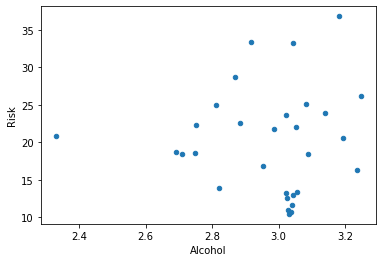

In [57]:
df.loc[df["Country"]=="South Korea"].plot.scatter(x="Alcohol", y="Risk")

<AxesSubplot:xlabel='Alcohol', ylabel='Risk'>

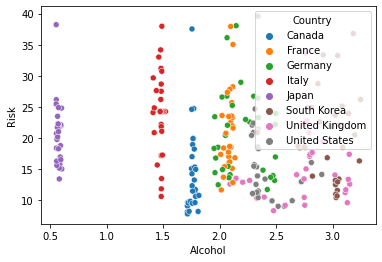

In [53]:
sns.scatterplot(x = "Alcohol", y = "Risk", hue = "Country", data = df)